#📄 **Dataset Description (Selected Variables)**

This project uses a curated subset of variables from the GYTS Thailand 2022 dataset. The selected variables represent four key dimensions: smoking behavior, nicotine dependence, social environment, perceptions, and demographics.

###🎯 **Target Variable**

**quit_ability_raw:** Student’s belief about whether they can quit smoking if they want to (CR17).

###🔥 **1. Smoking Behavior**

**smoke_days:** Number of days the student smoked in the past 30 days.

**cigs_per_day:** Number of cigarettes smoked per day.

###🧪 **2. Nicotine Dependence**

**morning_craving:** Craving felt immediately after waking.

**craving_delay:** Time until the urge to smoke begins after waking.

###👥 **3. Social Influence**

**friends_smoke:** Whether close friends smoke.

**parent_smoke:** Whether parents or guardians smoke.

###👣 **4. Demographic Controls**

**age:** Age of the student.

**sex:** Biological sex.

**grade:** School grade level.

**pocket_money:** Weekly personal spending money.



In [ ]:
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.9/252.9 kB 5.1 MB/s eta 0:00:00


#**EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import cross_validate
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

import pycountry_convert as pc


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving THAILAND_DATA_22.csv to THAILAND_DATA_22.csv


In [ ]:
data = pd.read_csv('THAILAND_DATA_22.csv')
data.head()

,GRPwgt,CR1,CR2,THR3,THR4,CR5,CR6,CR7,CR8,THR9,...,THR71,THR72,THR73,THR74,THR75,THR76,THR77,THR78,Stratum,PSU
0,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,202201001,1
1,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,202201001,1
2,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,202201001,1
3,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,202201001,1
4,111.63015,2.0,1.0,1,3,1.0,5.0,4.0,2.0,8.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,202201001,1


In [ ]:
df = data.copy()
df.head()

,GRPwgt,CR1,CR2,THR3,THR4,CR5,CR6,CR7,CR8,THR9,...,THR71,THR72,THR73,THR74,THR75,THR76,THR77,THR78,Stratum,PSU
0,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,202201001,1
1,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,202201001,1
2,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,202201001,1
3,111.63015,2.0,1.0,1,2,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,202201001,1
4,111.63015,2.0,1.0,1,3,1.0,5.0,4.0,2.0,8.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,202201001,1


In [ ]:
# Dictionary for renaming
rename_map = {
    "CR17": "quit_ability_raw",

    # Nicotine dependence

    "CR7": "smoke_days",
    "CR8": "cigs_per_day", #ok
    "CR11": "morning_craving",
    "CR12": "craving_delay",  # inconsitent
    "CR16": "stop_one_year", # inconsitent
    "THR40": "cigs_price",

    # Education
    "CR33": "tobacco_education",
    "CR34": "TV_influence", #map 1,3 -> 3
    "THR46": "media_influence", #map 1,3 -> 3

    # Social influence
    "THR12": "friends_smoke",
    "THR11": "parent_smoke",
    "CR18": "help_to_quit",  # inconsitent

    # Demographic controls
    "CR1": "age",
    "CR2": "sex",
    "THR3": "grade",
    "THR4": "pocket_money"
}

# Only keep variables that exist
available = {k:v for k,v in rename_map.items() if k in df.columns}

# Create clean dataframe
df_model = df[list(available.keys())].rename(columns=available)

df_model.head()

,quit_ability_raw,smoke_days,cigs_per_day,morning_craving,craving_delay,stop_one_year,cigs_price,tobacco_education,TV_influence,media_influence,friends_smoke,parent_smoke,help_to_quit,age,sex,grade,pocket_money
0,1.0,1.0,1.0,1.0,1,1.0,8.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1,2
1,1.0,1.0,1.0,1.0,1,1.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1,2
2,1.0,1.0,1.0,1.0,1,1.0,8.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2
3,1.0,1.0,1.0,1.0,1,1.0,8.0,2.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,1,2
4,4.0,4.0,2.0,1.0,1,3.0,1.0,3.0,3.0,3.0,3.0,1.0,6.0,2.0,1.0,1,3


In [ ]:
df_model.columns

Index(['quit_ability_raw', 'smoke_days', 'cigs_per_day', 'morning_craving',
       'craving_delay', 'stop_one_year', 'cigs_price', 'tobacco_education',
       'TV_influence', 'media_influence', 'friends_smoke', 'parent_smoke',
       'help_to_quit', 'age', 'sex', 'grade', 'pocket_money'],
      dtype='object')

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quit_ability_raw   7842 non-null   float64
 1   smoke_days         7774 non-null   float64
 2   cigs_per_day       7788 non-null   float64
 3   morning_craving    7842 non-null   float64
 4   craving_delay      7846 non-null   int64  
 5   stop_one_year      7845 non-null   float64
 6   cigs_price         7838 non-null   float64
 7   tobacco_education  7844 non-null   float64
 8   TV_influence       7837 non-null   float64
 9   media_influence    7840 non-null   float64
 10  friends_smoke      7845 non-null   float64
 11  parent_smoke       7845 non-null   float64
 12  help_to_quit       7842 non-null   float64
 13  age                7844 non-null   float64
 14  sex                7845 non-null   float64
 15  grade              7846 non-null   int64  
 16  pocket_money       7846 

In [ ]:
df_model.isna().sum()

,0
quit_ability_raw,4
smoke_days,72
cigs_per_day,58
morning_craving,4
craving_delay,0
stop_one_year,1
cigs_price,8
tobacco_education,2
TV_influence,9
media_influence,6


In [ ]:
#df_model.duplicated().sum()

In [ ]:
#df_model = df_model.drop_duplicates()

In [ ]:
df_model.shape

(7846, 17)

In [ ]:
df_model = df_model[df_model["quit_ability_raw"].isin([2,3,4])]

In [ ]:
df_model.shape

(1719, 17)

In [ ]:
df_model.duplicated().sum()

np.int64(12)

In [ ]:
df_model.isna().sum()

,0
quit_ability_raw,0
smoke_days,46
cigs_per_day,40
morning_craving,1
craving_delay,0
stop_one_year,1
cigs_price,3
tobacco_education,1
TV_influence,6
media_influence,5


In [ ]:
# Fill ordinal variables with median
ordinal_cols = [
     'smoke_days', 'cigs_per_day',
    'morning_craving', 'craving_delay', 'stop_one_year',
     'cigs_price', 'tobacco_education', 'help_to_quit', 'TV_influence',
    'media_influence'
]

for col in ordinal_cols:
    df_model[col] = df_model[col].fillna(df_model[col].median())

####**Missing-value imputation**

Missing values were imputed according to the measurement scale of each variable.  

**Ordinal variables** (e.g., smoking frequency, cravings, pocket money, age) were filled using the median, which preserves the ordinal structure and avoids creating non-existent category values that would occur if using the mean.  

In [ ]:
df_model.isna().sum()


,0
quit_ability_raw,0
smoke_days,0
cigs_per_day,0
morning_craving,0
craving_delay,0
stop_one_year,0
cigs_price,0
tobacco_education,0
TV_influence,0
media_influence,0


In [ ]:
# mapping 4 -> 0 & 2,3 -> 1
df_model["quit_ability_raw"] = df_model["quit_ability_raw"].replace({4:0, 2:1, 3:1})
df_model["media_influence"] = df_model["media_influence"].replace({1:3, 3:3})
df_model["TV_influence"] = df_model["TV_influence"].replace({1:3, 3:3})

In [ ]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
quit_ability_raw,1719.0,0.870273,0.336100,0.0,1.0,1.0,1.0,1.0
smoke_days,1719.0,1.748109,1.460367,1.0,1.0,1.0,2.0,7.0
cigs_per_day,1719.0,1.783013,1.344602,1.0,1.0,1.0,2.0,7.0
morning_craving,1719.0,1.650960,0.828963,1.0,1.0,1.0,2.0,4.0
craving_delay,1719.0,2.259453,2.145234,1.0,1.0,1.0,2.0,8.0
stop_one_year,1719.0,2.529378,0.709271,1.0,2.0,2.0,3.0,4.0
cigs_price,1719.0,3.270506,2.386323,1.0,2.0,2.0,4.0,8.0
tobacco_education,1719.0,1.513089,0.740267,1.0,1.0,1.0,2.0,3.0
TV_influence,1719.0,2.445608,0.497177,2.0,2.0,2.0,3.0,3.0
media_influence,1719.0,2.368237,0.482467,2.0,2.0,2.0,3.0,3.0


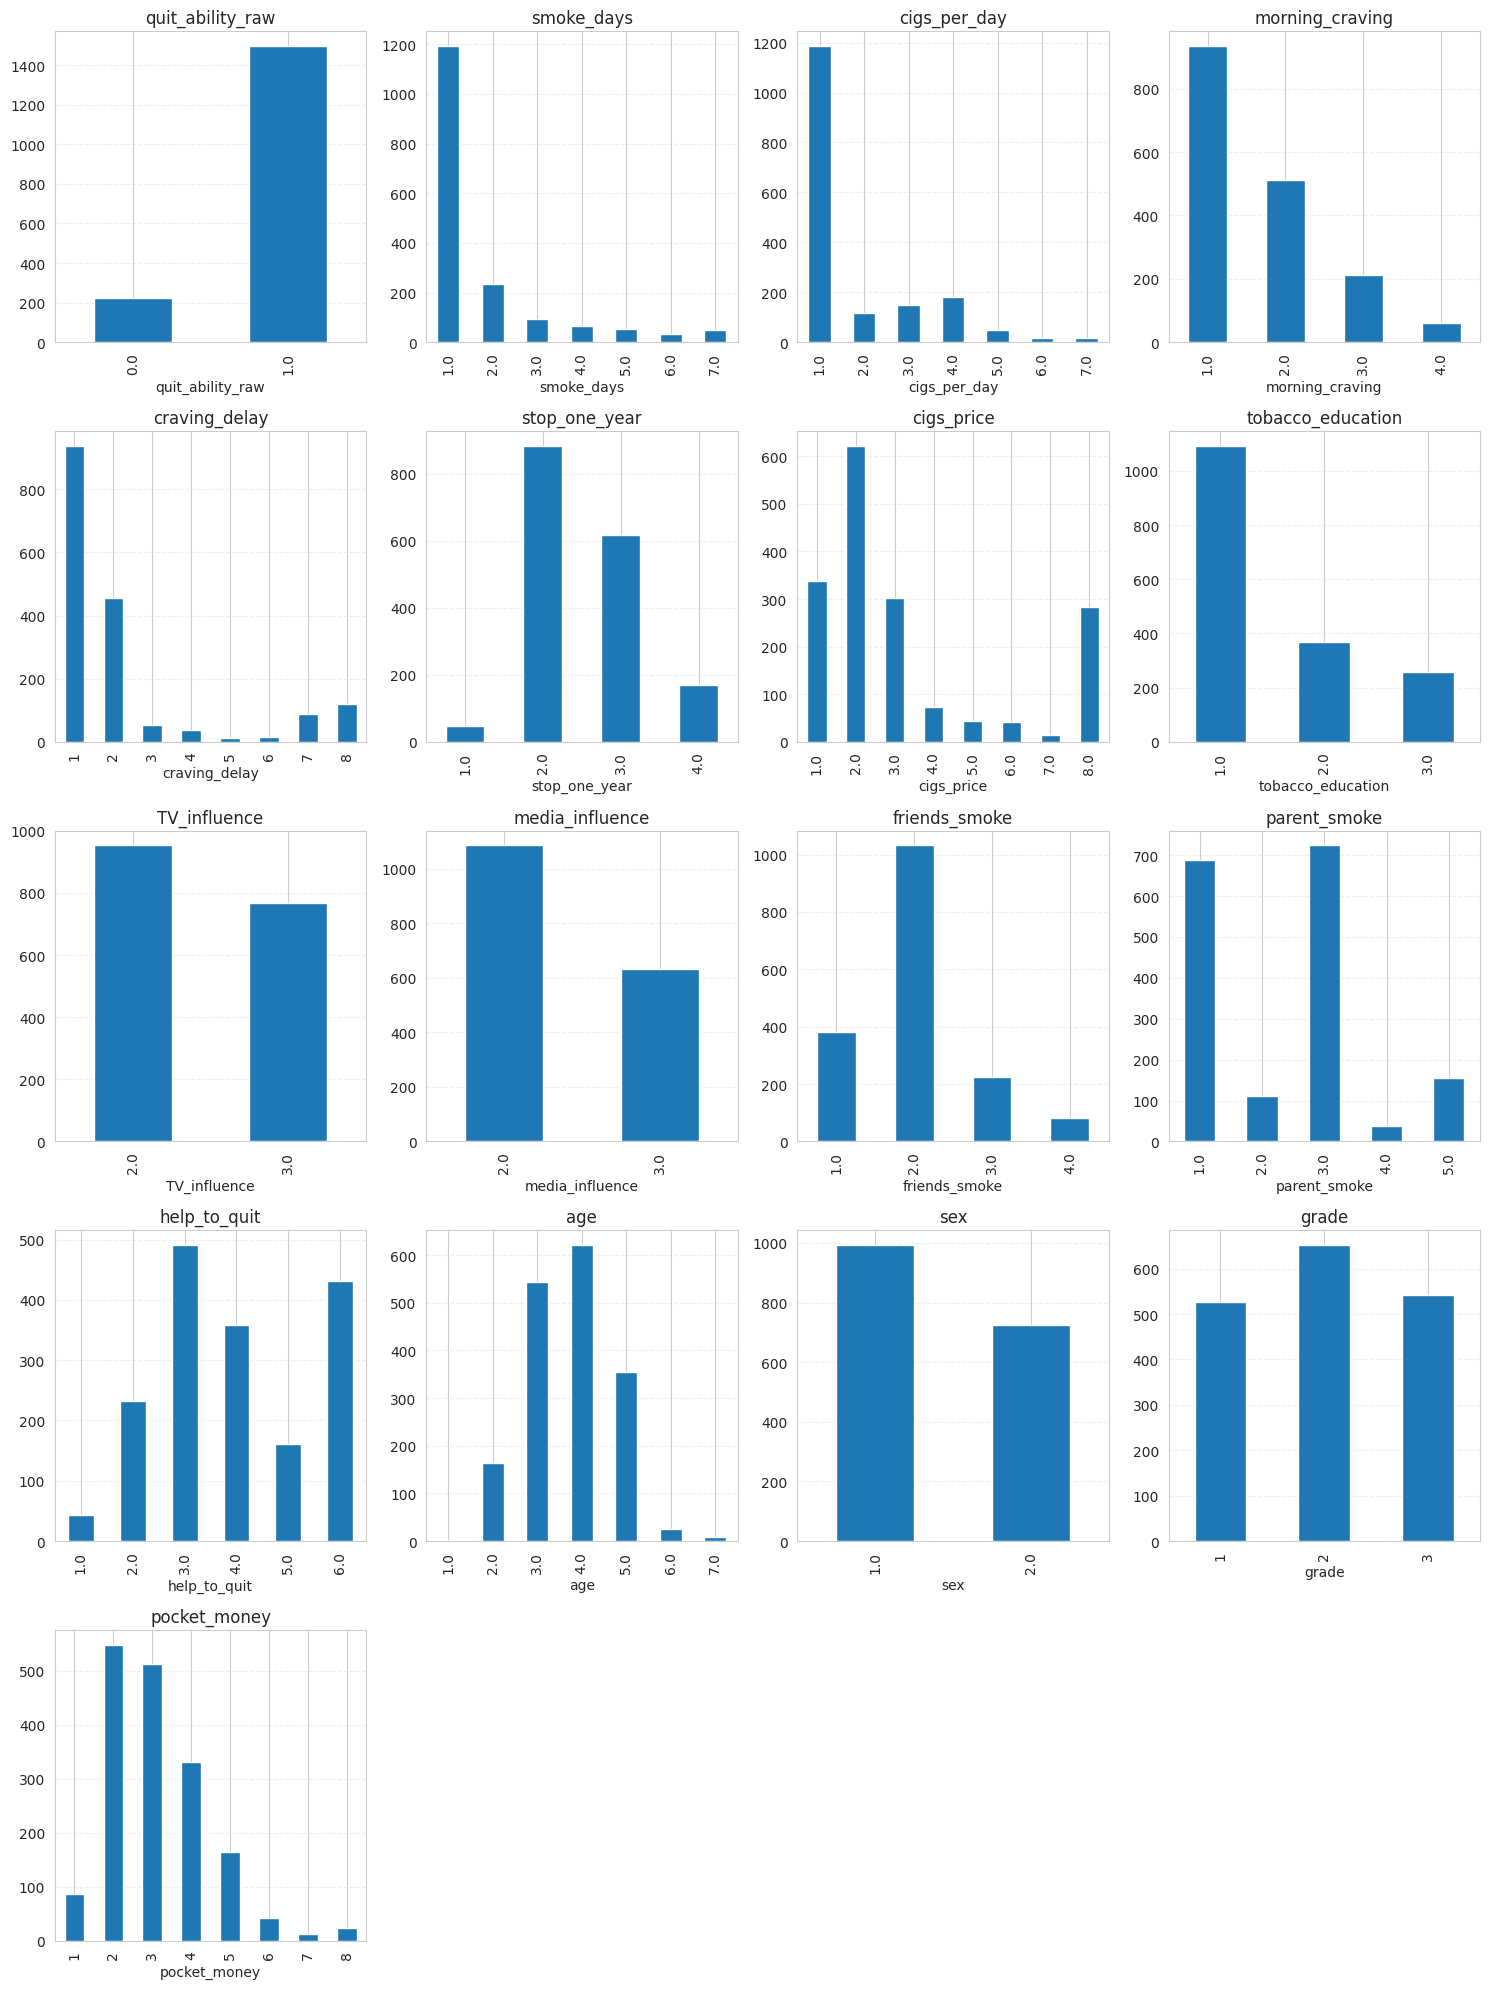

In [ ]:

cols = df_model.columns
n = len(cols)

# layout grid (số hàng–cột tự tính)
rows = int((n - 1) / 4) + 1   # 4 plots mỗi hàng
cols_per_row = 4

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(df_model.columns):
    df_model[col].value_counts().sort_index().plot.bar(
        ax=axes[i],
        edgecolor='white'
    )
    axes[i].set_title(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Tắt các ô thừa
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df_model = df_model.drop(["stop_one_year", "craving_delay", "help_to_quit", "morning_craving"], axis = 1)
df_model.shape

(1719, 13)

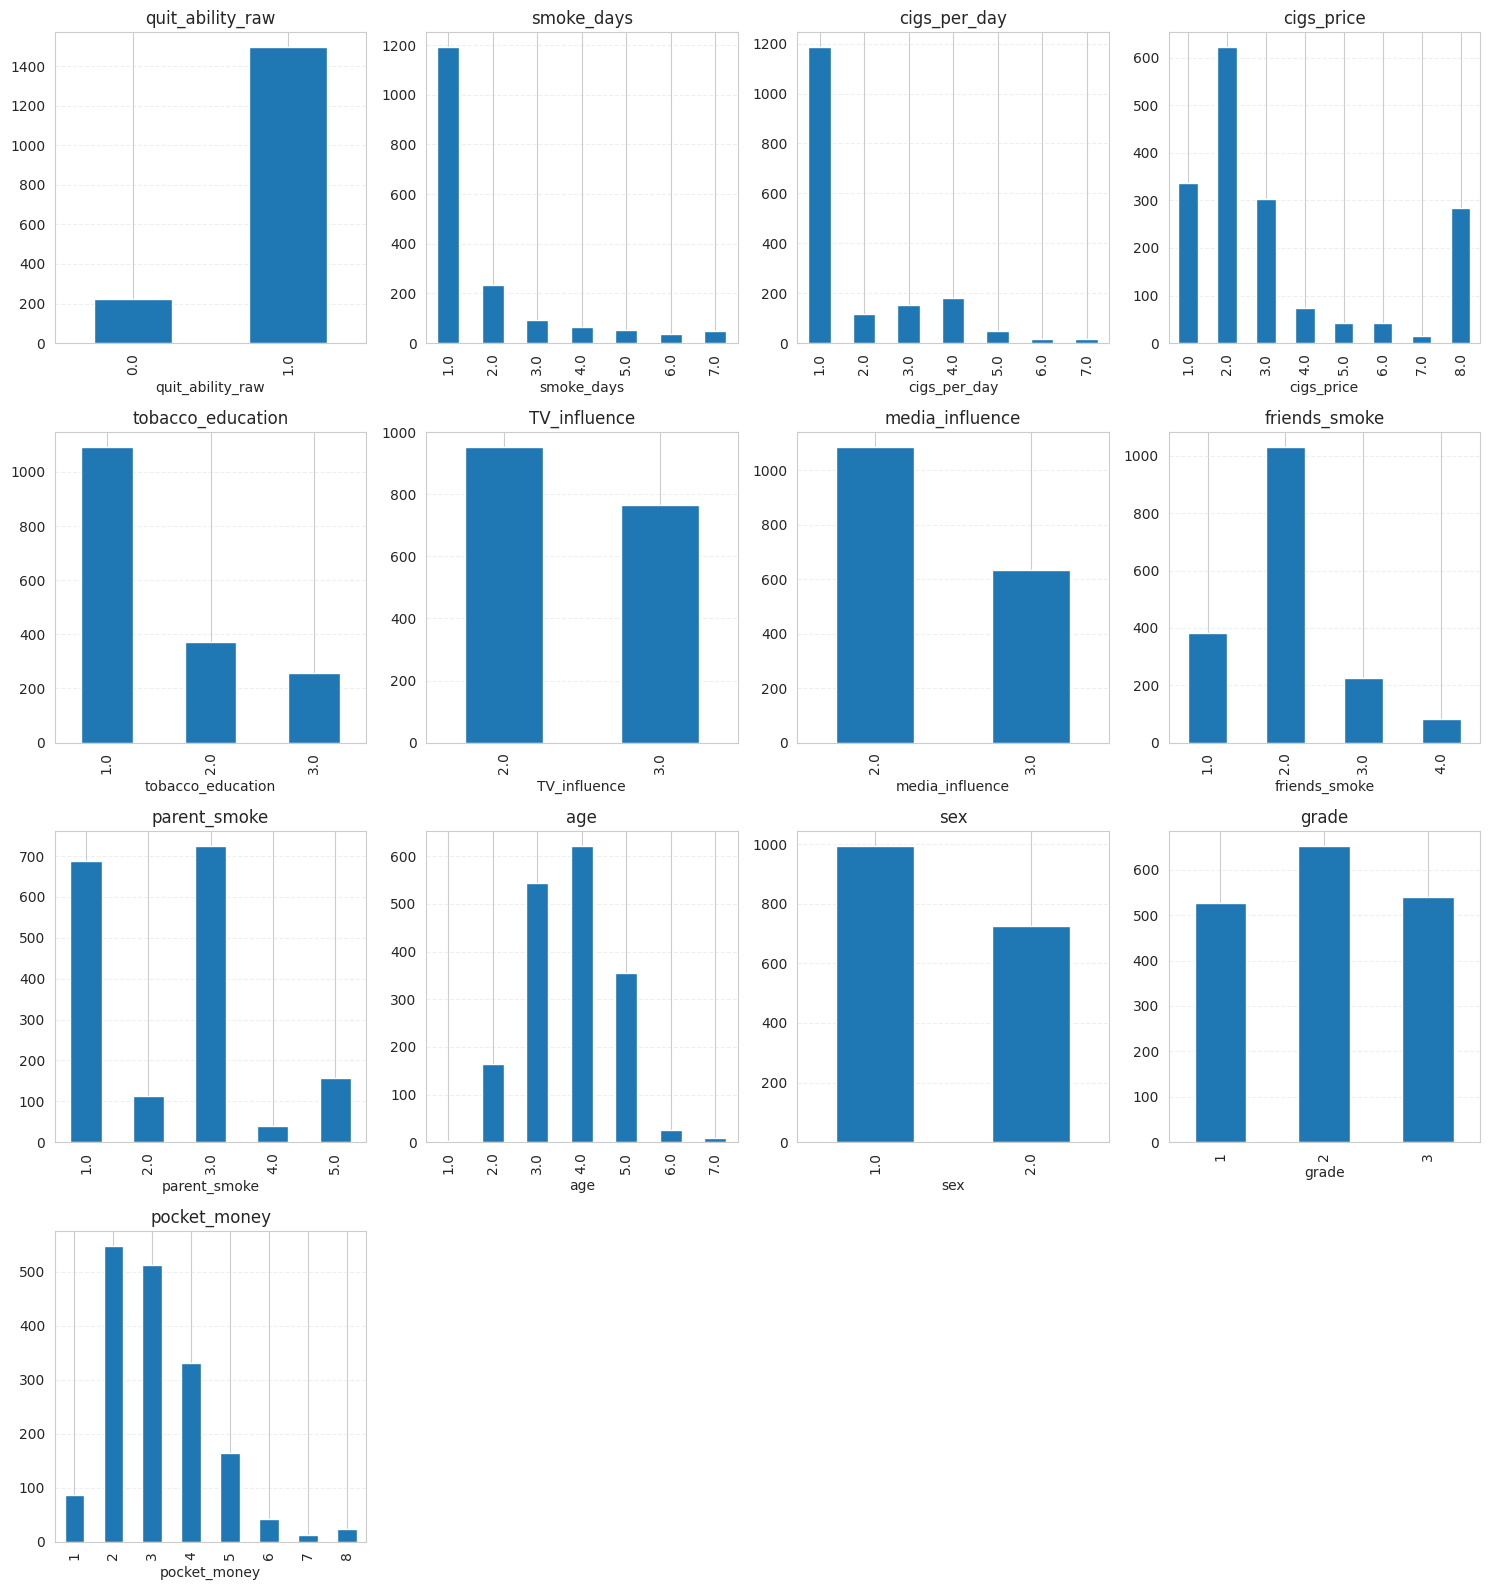

In [ ]:
cols = df_model.columns
n = len(cols)

# layout grid (số hàng–cột tự tính)
rows = int((n - 1) / 4) + 1   # 4 plots mỗi hàng
cols_per_row = 4

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(df_model.columns):
    df_model[col].value_counts().sort_index().plot.bar(
        ax=axes[i],
        edgecolor='white'
    )
    axes[i].set_title(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Tắt các ô thừa
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

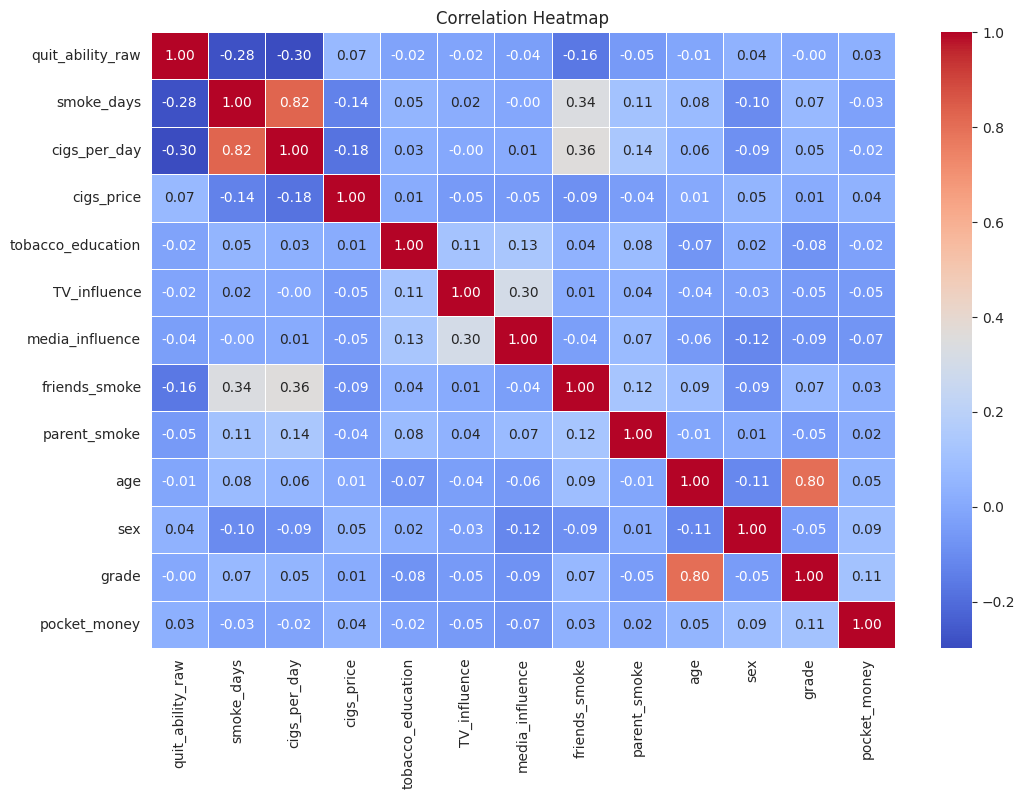

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_model.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

<Axes: >

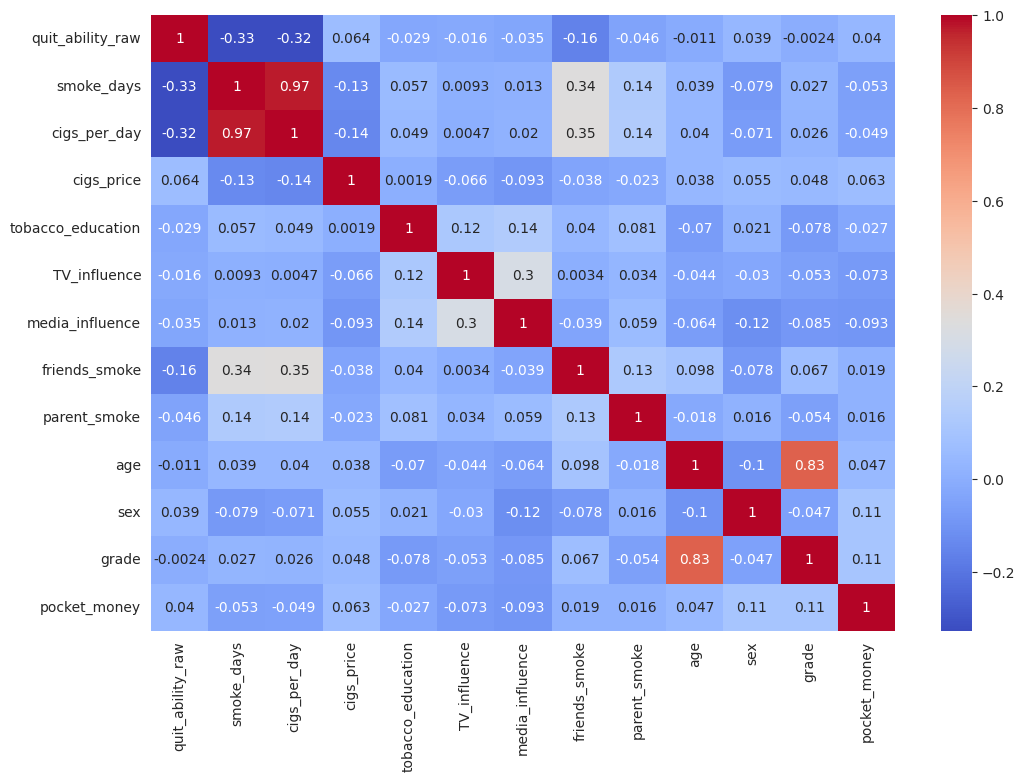

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_model.corr(method='spearman'), annot=True, cmap='coolwarm')


**Spearman correlation** is commonly used for ranked or ordinal data

In [ ]:
#df_model.to_csv('df_model.csv', index=False)
#files.download('df_model.csv')

#**Split and feature data**

In [ ]:
X = df_model.drop(["quit_ability_raw"], axis = 1)
y = df_model["quit_ability_raw"]

In [ ]:
X.columns

Index(['smoke_days', 'cigs_per_day', 'cigs_price', 'tobacco_education',
       'TV_influence', 'media_influence', 'friends_smoke', 'parent_smoke',
       'age', 'sex', 'grade', 'pocket_money'],
      dtype='object')

In [ ]:
y.name

'quit_ability_raw'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((1375, 12), (344, 12))

In [ ]:
X_train.dtypes

,0
smoke_days,float64
cigs_per_day,float64
cigs_price,float64
tobacco_education,float64
TV_influence,float64
media_influence,float64
friends_smoke,float64
parent_smoke,float64
age,float64
sex,float64


The dataset uses ranges → so scaling is not appropriate.

Logistic regression works perfectly with ordinal-encoded integers.

##**Logistic Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state= 42)
log_reg.fit(X_train, y_train)
log_reg

LogisticRegression(random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [ ]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(log_reg, X_train,
                            y_train, cv=10, scoring=scoring)  # cross_validate sets the train set into many folds
scores

{'fit_time': array([0.02654147, 0.0140779 , 0.01359081, 0.01892567, 0.01803231,
        0.02485061, 0.02387619, 0.0196507 , 0.03133249, 0.01578689]),
 'score_time': array([0.01635027, 0.01575804, 0.01757932, 0.01772666, 0.01687503,
        0.01745224, 0.01800656, 0.03579831, 0.01676059, 0.01466584]),
 'test_acc': array([0.86956522, 0.86956522, 0.87681159, 0.88405797, 0.89130435,
        0.83211679, 0.86861314, 0.86131387, 0.82481752, 0.88321168]),
 'test_prec_macro': array([0.43478261, 0.43478261, 0.9379562 , 0.94117647, 0.94444444,
        0.5004845 , 0.68703704, 0.43382353, 0.43129771, 0.81860902]),
 'test_rec_macro': array([0.5       , 0.5       , 0.52777778, 0.55555556, 0.58333333,
        0.5002451 , 0.5235761 , 0.49579832, 0.47478992, 0.57913165]),
 'test_f1_macro': array([0.46511628, 0.46511628, 0.51955765, 0.56875   , 0.61344538,
        0.49381526, 0.51456693, 0.4627451 , 0.452     , 0.6046176 ])}

In [ ]:

  for key in scores:
    if "test" in key:
        print(f"{key}: {np.mean(scores[key]):.3f}")

test_acc: 0.866
test_prec_macro: 0.656
test_rec_macro: 0.524
test_f1_macro: 0.516


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # Compare predictions vs real answers

array([[  3,  41],
       [  6, 294]])

In [ ]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.33      0.07      0.11        44
         1.0       0.88      0.98      0.93       300

    accuracy                           0.86       344
   macro avg       0.61      0.52      0.52       344
weighted avg       0.81      0.86      0.82       344

=== Confusion Matrix ===
[[  3  41]
 [  6 294]]


The 10-fold cross-validation accuracy is 0.866, indicating the model’s expected average performance across multiple training–validation splits.

The test accuracy is 0.86, which represents the performance of the final model on completely unseen data.

The closeness of these values suggests that the model generalizes well and does not suffer from severe overfitting.

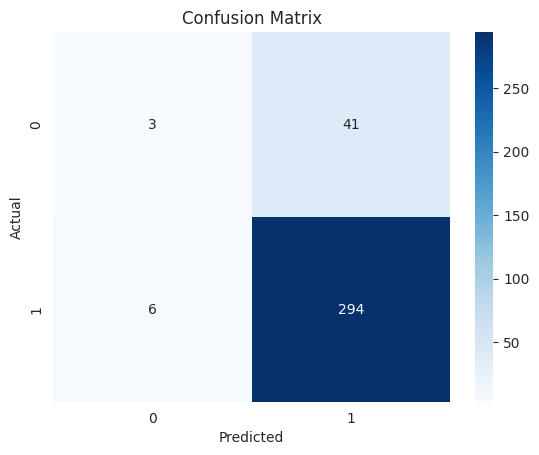

In [ ]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression (Baseline Model)

The baseline Logistic Regression model was trained on the original dataset without applying any class balancing techniques. Because the dataset is highly imbalanced—with class 1 representing the majority—the model tends to prioritize predicting the dominant class.

As a result, the model achieves very high recall for class 1 but performs poorly on class 0, producing a large number of false positives and very few true negatives. This indicates that the model follows a “safe strategy” by predicting class 1 for most cases instead of learning to properly distinguish between the two classes.

The baseline model serves as a reference point for evaluating the effectiveness of imbalance-handling methods introduced in later models.


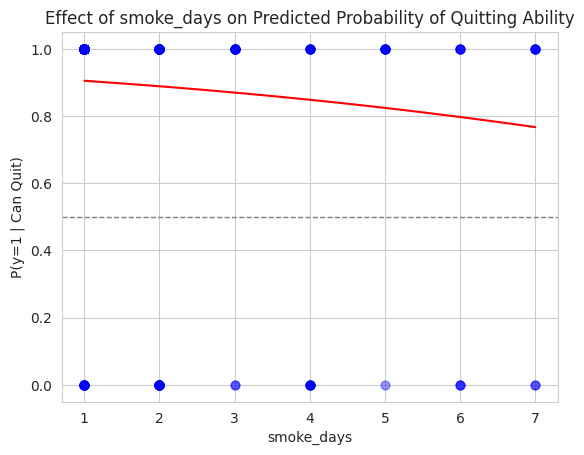

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Re-run train_test_split within this cell to ensure X_train, X_test, y_train, y_test are defined.
# X and y are expected to be defined globally from previous executed cells.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot sigmoid curve
plot_variable = 'smoke_days' # <--- Changed to 'smoke_days'
x_range = np.linspace(X_test[plot_variable].min(), X_test[plot_variable].max(), 300)

# Get all feature names in the order the model was trained on (from X_train)
feature_names = X_train.columns

# Create a dictionary to hold mean values for each feature
mean_values = {col: X_test[col].mean() for col in feature_names}

# Create a DataFrame where each column is filled with its mean value, replicated 'len(x_range)' times
# This ensures all columns are present and in the correct order as per feature_names
X_plot = pd.DataFrame([mean_values] * len(x_range), columns=feature_names)

# Now, overwrite the selected plot_variable column with the x_range values
X_plot[plot_variable] = x_range

y_prob = log_reg.predict_proba(X_plot)[:, 1]

#Plot sigmoid curve
plt.plot(x_range, y_prob, color='red')
# Scatter points
plt.scatter(X_test[plot_variable], y_test, color='blue', alpha=0.4, label='Actual data (0 or 1)', s=40)
# Add a horizontal line at 0.5
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Decision threshold (0.5)')
plt.xlabel(plot_variable)
plt.ylabel('P(y=1 | Can Quit)')
plt.title(f'Effect of {plot_variable} on Predicted Probability of Quitting Ability')
plt.show()

## Summary:

The combined sigmoid plot reveals that both `smoke_days` and `cigs_per_day` negatively influence the perceived ability to quit smoking (`quit_ability_raw`). As `smoke_days` increases, the probability of believing one can quit generally decreases. This relationship is further modulated by `cigs_per_day`: individuals with higher `cigs_per_day` values consistently show a lower probability of quitting ability across the range of `smoke_days`. Specifically, higher `cigs_per_day` values (e.g., 2.0 at the 75th percentile) shift the entire probability curve downwards compared to lower values (e.g., 1.0 at the 25th and 50th percentiles).

### Data Analysis Key Findings
*   **Inverse Relationship with `smoke_days`**: Across all `cigs_per_day` levels, an increase in `smoke_days` (frequency of smoking) leads to a decrease in the predicted probability of `quit_ability_raw`.
*   **Modulating Effect of `cigs_per_day`**: Higher `cigs_per_day` values consistently result in a lower probability of `quit_ability_raw`. For instance, the 75th percentile (2.0 cigarettes per day) shows a distinctly lower probability curve compared to the 25th and 50th percentiles (both 1.0 cigarette per day).
*   **Threshold Behavior**: The most significant drop in quitting probability occurs at lower `smoke_days` values, indicating a strong initial negative impact. The marginal effect of additional `smoke_days` diminishes as `smoke_days` increases, with the curves flattening out.
*   **Interaction between Variables**: Even with minimal `smoke_days`, a higher `cigs_per_day` leads to a lower perceived quitting ability. This suggests that both frequency and intensity of smoking are crucial factors.

### Insights or Next Steps
*   Interventions aimed at increasing quitting ability should consider both the frequency (`smoke_days`) and intensity (`cigs_per_day`) of smoking, as reducing either or both could improve an individual's self-efficacy.
*   Future modeling could explore the exact threshold of `smoke_days` where the impact on quitting ability becomes most pronounced to target early intervention strategies more effectively.


##**class_weight='balanced'**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=2000)
model.fit(X_train, y_train)

y_pred_1 = model.predict(X_test)



In [ ]:
y_pred_1

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1.

In [ ]:
scoring_bl = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores_bl = cross_validate(model, X_train,
                            y_train, cv=10, scoring=scoring)
scores_bl

{'fit_time': array([0.03185415, 0.02177238, 0.01977658, 0.02014613, 0.02084899,
        0.02088785, 0.01923633, 0.02452183, 0.01787567, 0.02243757]),
 'score_time': array([0.01508045, 0.01442862, 0.01446557, 0.01519465, 0.01789236,
        0.01448727, 0.0157795 , 0.01651335, 0.01434469, 0.01498103]),
 'test_acc': array([0.76086957, 0.7173913 , 0.7826087 , 0.76086957, 0.75362319,
        0.73722628, 0.79562044, 0.71532847, 0.70072993, 0.75912409]),
 'test_prec_macro': array([0.60402219, 0.58071411, 0.61851415, 0.58230329, 0.61938776,
        0.59249084, 0.63854167, 0.56946625, 0.61399909, 0.62323391]),
 'test_rec_macro': array([0.67361111, 0.64861111, 0.68611111, 0.62638889, 0.71666667,
        0.67328431, 0.71732026, 0.62394958, 0.7334267 , 0.71988796]),
 'test_f1_macro': array([0.61468821, 0.57962977, 0.63362832, 0.59057808, 0.6289149 ,
        0.59600262, 0.6575    , 0.56803299, 0.60289855, 0.63448945])}

In [ ]:
 for key in scores_bl:
    if "test" in key:
        print(f"{key}: {np.mean(scores_bl[key]):.3f}")

test_acc: 0.748
test_prec_macro: 0.604
test_rec_macro: 0.682
test_f1_macro: 0.611


In [ ]:
# ---------------------
# 4. Metrics
# ---------------------
print("=== Classification Report with balance-weighted ===")
print(classification_report(y_test, y_pred_1))

print("=== Confusion Matrix ===")
cm_1 = confusion_matrix(y_test, y_pred_1)
print(cm_1)

=== Classification Report with balance-weighted ===
              precision    recall  f1-score   support

         0.0       0.30      0.64      0.41        44
         1.0       0.94      0.78      0.85       300

    accuracy                           0.76       344
   macro avg       0.62      0.71      0.63       344
weighted avg       0.85      0.76      0.79       344

=== Confusion Matrix ===
[[ 28  16]
 [ 66 234]]


The 10-fold cross-validation accuracy is 0.748, indicating the model’s expected average performance across multiple training–validation splits.

The test accuracy is 0.76, which represents the performance of the final model on completely unseen data.

The closeness of these values suggests that the model generalizes well and does not suffer from severe overfitting.

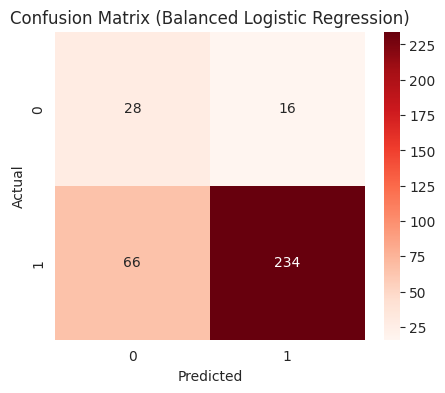

In [ ]:
# ---------------------
# 5. Plot Confusion Matrix
# ---------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix (Balanced Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression with Balanced Class Weight

In the second model, Logistic Regression was trained using `class_weight='balanced'`. This technique automatically adjusts the weight of each class based on its frequency in the dataset, ensuring that the minority class receives proportionally higher importance during training.

By increasing the penalty for misclassifying minority-class instances, the model is encouraged to learn more discriminative patterns instead of defaulting to the majority prediction. As a result, the number of false positives is reduced, true negatives increase, and the model becomes more balanced in its performance across both classes.

This approach is a simple yet effective way to handle class imbalance without modifying the dataset directly.


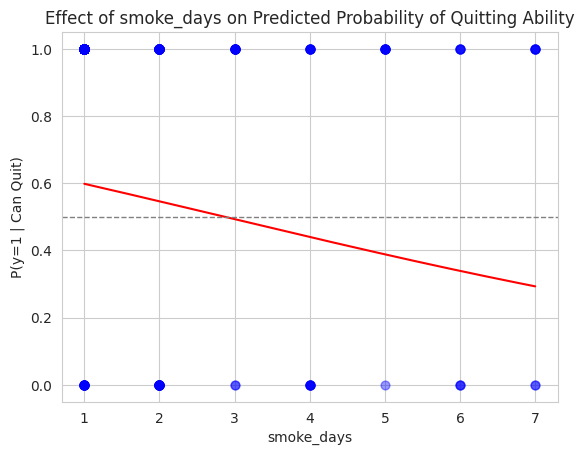

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Re-run train_test_split within this cell to ensure X_train, X_test, y_train, y_test are defined.
# X and y are expected to be defined globally from previous executed cells.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot sigmoid curve
plot_variable = 'smoke_days' # <--- Changed to 'smoke_days'
x_range = np.linspace(X_test[plot_variable].min(), X_test[plot_variable].max(), 300)

# Get all feature names in the order the model was trained on (from X_train)
feature_names = X_train.columns

# Create a dictionary to hold mean values for each feature
mean_values = {col: X_test[col].mean() for col in feature_names}

# Create a DataFrame where each column is filled with its mean value, replicated 'len(x_range)' times
# This ensures all columns are present and in the correct order as per feature_names
X_plot = pd.DataFrame([mean_values] * len(x_range), columns=feature_names)

# Now, overwrite the selected plot_variable column with the x_range values
X_plot[plot_variable] = x_range

y_prob = model.predict_proba(X_plot)[:, 1]

#Plot sigmoid curve
plt.plot(x_range, y_prob, color='red')
# Scatter points
plt.scatter(X_test[plot_variable], y_test, color='blue', alpha=0.4, label='Actual data (0 or 1)', s=40)
# Add a horizontal line at 0.5
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Decision threshold (0.5)')
plt.xlabel(plot_variable)
plt.ylabel('P(y=1 | Can Quit)')
plt.title(f'Effect of {plot_variable} on Predicted Probability of Quitting Ability')
plt.show()

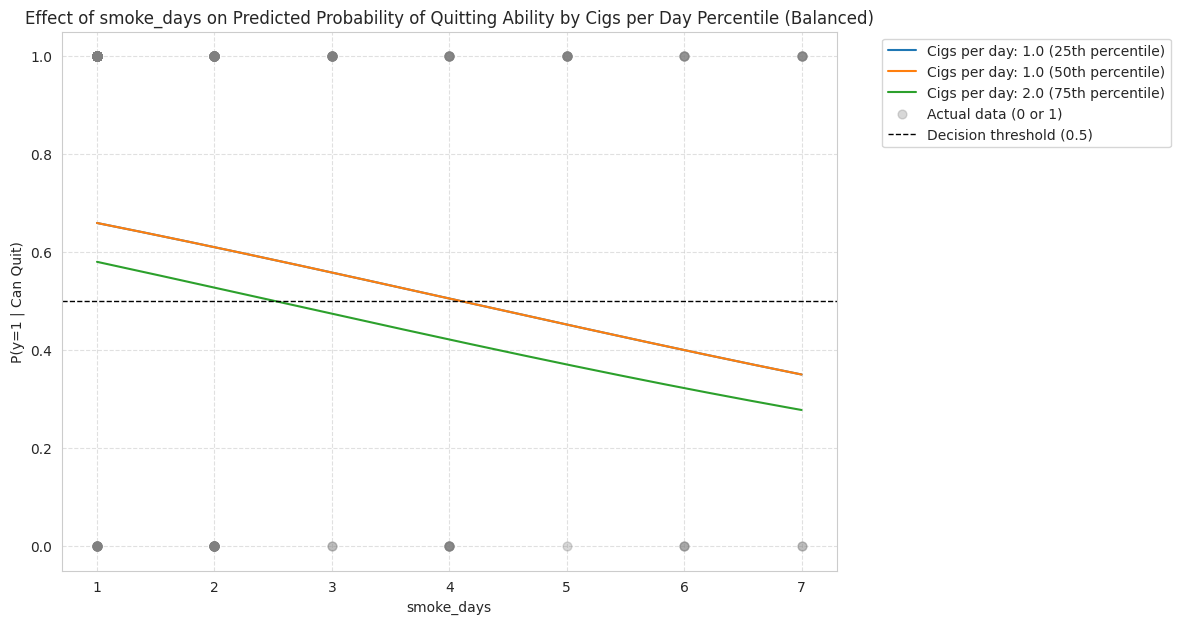

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Re-run train_test_split within this cell to ensure X_train, X_test, y_train, y_test are defined.
# X and y are expected to be defined globally from previous executed cells.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the primary variable for the x-axis and its range
plot_variable = 'smoke_days'
x_range = np.linspace(X_test[plot_variable].min(), X_test[plot_variable].max(), 300)

# Get all feature names in the order the model was trained on (from X_train)
feature_names = X_train.columns

# Create a dictionary to hold mean values for each feature from the test set
mean_values = {col: X_test[col].mean() for col in feature_names}

# Calculate 25th, 50th (median), and 75th percentile values for 'cigs_per_day' from the test set
cigs_per_day_percentiles = X_test['cigs_per_day'].quantile([0.25, 0.50, 0.75])

plt.figure(figsize=(10, 7))

# Plot sigmoid curves for different 'cigs_per_day' percentiles
for percentile, cigs_val in cigs_per_day_percentiles.items():
    # Create a DataFrame where each column is filled with its mean value
    X_plot_temp = pd.DataFrame([mean_values] * len(x_range), columns=feature_names)

    # Overwrite the selected plot_variable column with the x_range values
    X_plot_temp[plot_variable] = x_range

    # Set the 'cigs_per_day' column to the current percentile value
    X_plot_temp['cigs_per_day'] = cigs_val

    # Predict probabilities
    y_prob = model.predict_proba(X_plot_temp)[:, 1] # Using 'model' (balanced logistic regression)

    # Plot sigmoid curve
    plt.plot(x_range, y_prob, label=f'Cigs per day: {cigs_val} ({int(percentile*100)}th percentile)')

# Scatter actual data points
plt.scatter(X_test[plot_variable], y_test, color='gray', alpha=0.3, label='Actual data (0 or 1)', s=40)

# Add a horizontal line at 0.5
plt.axhline(0.5, color='black', linestyle='--', linewidth=1, label='Decision threshold (0.5)')

plt.xlabel(plot_variable)
plt.ylabel('P(y=1 | Can Quit)')
plt.title(f'Effect of {plot_variable} on Predicted Probability of Quitting Ability by Cigs per Day Percentile (Balanced)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Moved legend outside
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Thử tạo balanced bằng SMOTE

##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion="gini",
                                  random_state=100,
                                  max_depth=3,
                                  min_samples_leaf=5,
                                  class_weight = "balanced")
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
y_pred_gini

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate

In [ ]:
print(f"The model tested accuracy score with gini index is: {accuracy_score(y_test, y_pred_gini):.3f}")


The model tested accuracy score with gini index is: 0.738


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
print(f"The model trained accuracy score with gini index is: {accuracy_score(y_train, y_pred_train_gini):.3f}")

The model trained accuracy score with gini index is: 0.717


The accuracy scores of the model for training and testing dataset are both high at 0.7. Thus, there is no overfitting problem

In [ ]:
scoring_tree = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores_tree = cross_validate(clf_gini, X_train,
                            y_train, cv=10, scoring=scoring_tree)
scores_tree

{'fit_time': array([0.01088572, 0.00695372, 0.0065949 , 0.00622296, 0.00541854,
        0.00617099, 0.00543833, 0.0062964 , 0.00611639, 0.00614691]),
 'score_time': array([0.0117321 , 0.01802588, 0.01133323, 0.01075816, 0.01072598,
        0.01146317, 0.01098847, 0.0133369 , 0.01251483, 0.01548052]),
 'test_acc': array([0.73913043, 0.73913043, 0.74637681, 0.73913043, 0.73913043,
        0.72262774, 0.72262774, 0.68613139, 0.67153285, 0.72262774]),
 'test_prec_macro': array([0.59157895, 0.64863636, 0.624847  , 0.58088235, 0.63043478,
        0.60615942, 0.60410557, 0.58835807, 0.60288248, 0.65138331]),
 'test_rec_macro': array([0.66111111, 0.80277778, 0.73611111, 0.6375    , 0.75555556,
        0.71544118, 0.69887955, 0.67787115, 0.71661998, 0.81676004]),
 'test_f1_macro': array([0.59675325, 0.64875566, 0.63171941, 0.58558559, 0.63384434,
        0.60392575, 0.60392575, 0.57523974, 0.57984052, 0.64205171])}

In [ ]:
for key in scores_tree:
    if "test" in key:
        print(f"{key}: {np.mean(scores_tree[key]):.3f}")

test_acc: 0.723
test_prec_macro: 0.613
test_rec_macro: 0.722
test_f1_macro: 0.610


[Text(0.5, 0.875, 'smoke_days <= 1.5\ngini = 0.5\nsamples = 1375\nvalue = [687.5, 687.5]\nclass = 0.0'),
 Text(0.25, 0.625, 'pocket_money <= 6.5\ngini = 0.413\nsamples = 951\nvalue = [211.243, 515.05]\nclass = 1.0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'pocket_money <= 1.5\ngini = 0.395\nsamples = 929\nvalue = [188.198, 505.853]\nclass = 1.0'),
 Text(0.0625, 0.125, 'gini = 0.486\nsamples = 46\nvalue = [30.726, 21.844]\nclass = 0.0'),
 Text(0.1875, 0.125, 'gini = 0.37\nsamples = 883\nvalue = [157.472, 484.009]\nclass = 1.0'),
 Text(0.375, 0.375, 'cigs_price <= 1.5\ngini = 0.408\nsamples = 22\nvalue = [23.045, 9.197]\nclass = 0.0'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0.0, 3.449]\nclass = 1.0'),
 Text(0.4375, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [23.045, 5.748]\nclass = 0.0'),
 Text(0.75, 0.625, 'friends_smoke <= 2.5\ngini = 0.39\nsamples = 424\nvalue = [476.257, 172.45]\nclass = 0.0'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'cigs_price

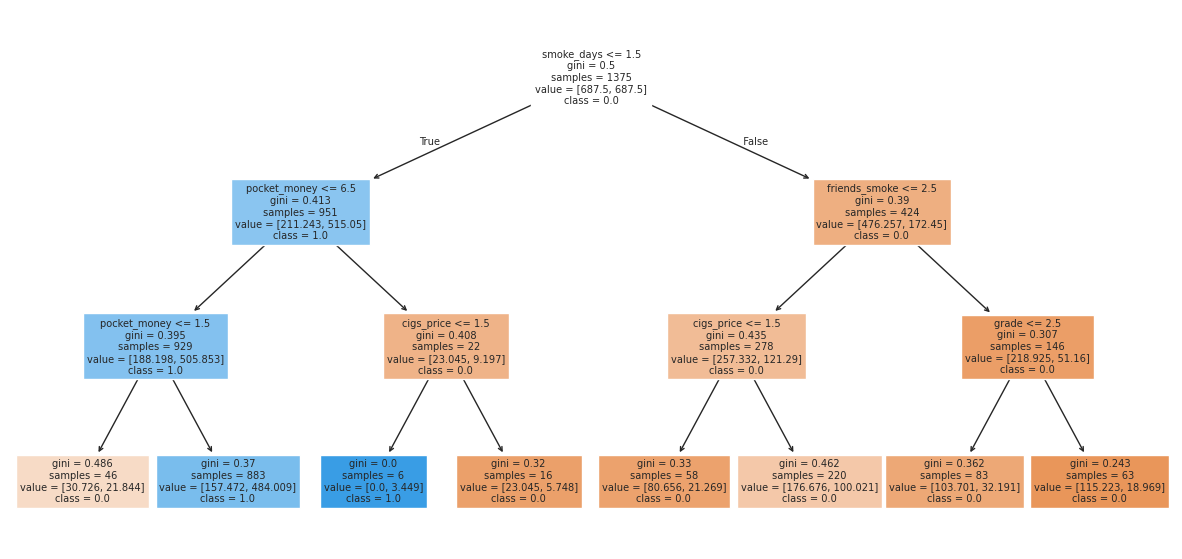

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(
    clf_gini,
    feature_names=X_train.columns,
    class_names=[str(c) for c in clf_gini.classes_],
    filled=True
)

The decision tree shows that the strongest predictor of smoking is **smoke_days**. Among the 1,375 students, those with **≤ 1.5 smoke days** form a low-risk group (951 samples, 29% smokers). Within this group, **pocket_money** plays the biggest role: students with **≤ 1.5** units of pocket money (929 samples) show a low smoking rate (27%), whereas a very small subgroup with very high pocket money (**> 6.5**, 22 samples) shows a much higher rate (~72%).

For students with **> 1.5 smoke days** (424 samples), the smoking likelihood increases sharply. In this branch, **peer influence** is the strongest factor: students with **> 2.5 friends who smoke** (146 samples) have an extremely high smoking rate (81%), while even those with fewer smoking friends (278 samples) still show elevated risk (68%). **Cheap cigarettes (≤ 1.5 in price)** further increase smoking probability in these groups. **Grade level** also contributes, with older students in this high-risk path showing smoking rates above 60%.

Overall, smoking behavior is primarily driven by prior smoking frequency, followed by pocket money for low-risk students and peer influence plus cigarette affordability for high-risk students.


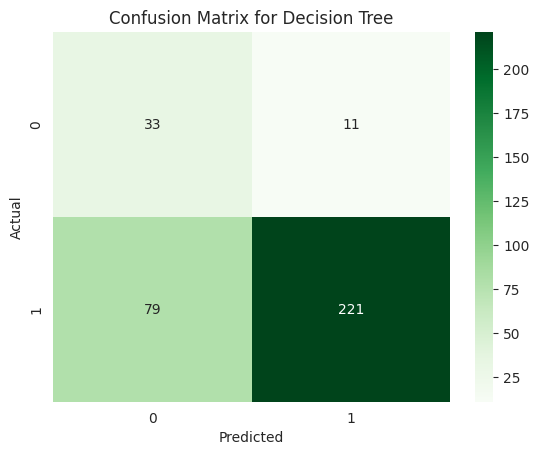

In [ ]:
# plot the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

The confusion matrix shows that the decision tree performs well on predicting smokers (class 1) but struggles more with non-smokers (class 0). Out of the actual non-smokers, the model correctly identifies **33** but incorrectly labels **11** as smokers. For actual smokers, it correctly predicts **221** and misclassifies **79** as non-smokers. This indicates high sensitivity toward detecting smokers but lower specificity for detecting non-smokers, meaning the model is better at identifying students who do smoke than those who don’t.


## 🔍 Comparison of the Three Models

The three models—Baseline Logistic Regression, Balanced Logistic Regression, and the Decision Tree—show distinct strengths depending on whether the goal is **overall accuracy** or **balanced class detection**.

### **1. Baseline Logistic Regression**
- **Accuracy:** 0.86 (highest among all models)
- **Behavior:** Predicts almost everything as class 1 (high quitting ability)
- **Confusion Matrix:** Only **3 true negatives** out of 44 → extremely poor detection of class 0
- **Interpretation:** The model is dominated by the class imbalance and chooses the “safe route” of predicting the majority class. Excellent at detecting class 1 (recall 0.98) but nearly blind to class 0 (recall 0.07).

### **2. Balanced Logistic Regression (class_weight='balanced')**
- **Accuracy:** 0.76 (drops from baseline, as expected)
- **Improvements:** Major gains in minority-class detection  
  - Class 0 recall increases from **0.07 → 0.64**  
  - Class 1 recall decreases slightly from **0.98 → 0.78**
- **Confusion Matrix:** Class 0 predictions improve dramatically (28 correct vs only 3 in baseline)
- **Interpretation:** By adjusting class weights, the model no longer ignores class 0. It becomes much more equitable across classes, sacrificing some overall accuracy to reduce bias caused by class imbalance.

### **3. Decision Tree (Gini, class_weight='balanced')**
- **Accuracy:** 0.74 (close to balanced logistic regression)
- **Confusion Matrix:**  
  - **33 true negatives** (best among all models)  
  - **221 true positives**
- **Behavior:** More interpretable and naturally captures nonlinear relationships.
- **Interpretation:** The Decision Tree achieves the best balance in predicting both classes. It recognizes patterns such as smoke_days, pocket_money, and friends_smoke, producing a more intuitive split of the student population.

---

## 🎯 **Summary**
- **Best overall accuracy:** *Baseline Logistic Regression*  
- **Best class balance & fairness:** *Decision Tree*  
- **Best compromise (balanced but still stable):** *Balanced Logistic Regression*  

Overall, the Decision Tree provides the most balanced and interpretable performance, while Logistic Regression is preferable when maximizing accuracy is the primary objective.
